In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular workspace, you'll practice creating single-variable plots for categorical data.

In [95]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# solution script imports
from solutions_univ import bar_chart_solution_1, bar_chart_solution_2

In this workspace, you'll be working with this dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in [this GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [96]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

The basic syntax for any bar chart in seaborn is `sb.countplot(data = df, x = 'cat_var')`
A variation is if you have a pandas series, python list, or 1-d NumPy array, you can pass that as the one parameter.

In [97]:
def bar_chart_solution_1():
    """
    Solution for Question 1 in bar chart practice: create a bar chart of
    Pokemon species introduced by generation.
    """
    sol_string = ["I used seaborn's countplot function to generate this chart.",
                  "I also added an additional argument so that each bar has the same color."]
    print((" ").join(sol_string))

    # data setup
    pokemon = pd.read_csv('./data/pokemon.csv')

    # running sb.color_palette() gives you a list of RGB tuples for the colors used -- they look like a rainbow by default
    # and this just picks the first one -- 1 is orange, etc. run it without color=base_color and you'll see
    base_color = sb.color_palette()[0]
    # get the indices of the most to least numerous generations from that column
    gen_order = pokemon.generation_id.value_counts().index
    # in addition to the basic parameters, we have one for color and order -- order takes a list with index values
    sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order)

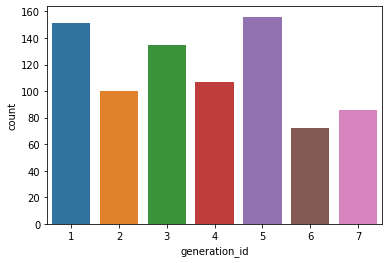

In [98]:
# even simpler!
sb.countplot(pokemon.generation_id)

Once you've created your chart, run the cell below to check the output from our solution. Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.

I used seaborn's countplot function to generate this chart. I also added an additional argument so that each bar has the same color.


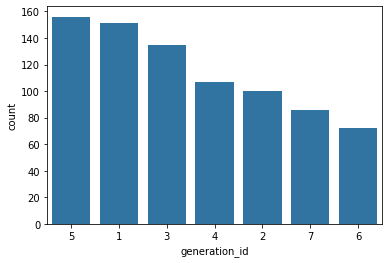

In [99]:
bar_chart_solution_1()

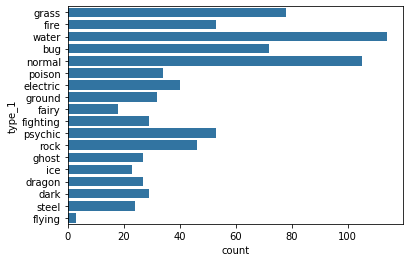

In [100]:
# First we make another bar chart like the one above, but for types
base_color = sb.color_palette()[0]
# we set the x parameter as y for a horizontal chart
sb.countplot(data = pokemon, y = 'type_1', color = base_color);
# This is one way to deal with too many x ticks
#plt.xticks(rotation=90);


**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [101]:
# There are 807 type ones and 405 type twos, so the unpivoted df will have 1212 rows.
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()

In [102]:
# The point of melt is to move from wide to long format dataframes. Wide is what we're used to --
# in long, the one or more columns are identifier variables, while all other columns, considered 
# measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.
# For example:
# creating a dataframe 
df = pd.DataFrame({'Name': {0: 'John', 1: 'Bob', 2: 'Shiela'}, 
                   'Course': {0: 'Masters', 1: 'Graduate', 2: 'Graduate'}, 
                   'Age': {0: 27, 1: 23, 2: 21}}) 
df

,Name,Course,Age
0,John,Masters,27
1,Bob,Graduate,23
2,Shiela,Graduate,21


In [103]:
# Name is id_vars and Course is value_vars 
pd.melt(df, id_vars =['Name'], value_vars =['Course']) 

,Name,variable,value
0,John,Course,Masters
1,Bob,Course,Graduate
2,Shiela,Course,Graduate


In [104]:
# or multiple unpivot columns 
pd.melt(df, id_vars =['Name'], value_vars =['Course', 'Age']) 

,Name,variable,value
0,John,Course,Masters
1,Bob,Course,Graduate
2,Shiela,Course,Graduate
3,John,Age,27
4,Bob,Age,23
5,Shiela,Age,21


Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

In [116]:
max_type_count = type_counts[0]
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

Text(0.5, 0, 'proportion')

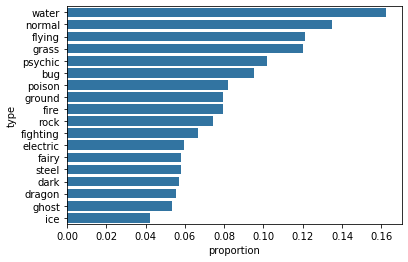

In [110]:
# data setup
pokemon = pd.read_csv('./data/pokemon.csv')
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                      value_vars = ['type_1', 'type_2'], 
                      var_name = 'type_level', value_name = 'type').dropna()

# produce a series that can be indexed like lists, ie the second most common type is type_counts[1], 109
# and its index, ie ['water', 'normal', 'flying'...]
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

# Computer largest proportions
# the number of rows in pokemon df., 807
n_pokemon = pkmn_types['species'].unique().shape[0]
# that'll be water: 131
max_type_count = type_counts[0]
# eg 131/807 = .162
max_prop = max_type_count / n_pokemon

# establish tick locations and create plot
base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
#{:0.2f} : means format_spec 0.2 is the precision and f means float
# it actually works fine without the str.format() 
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
# [.02, .04 ec] * 807 = array([[0.  ,  16.14,  32.28 etc]), so the graph is actually measuring the same
# thing as the simpler one above, but displaying tick_names
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solutions_univ.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!

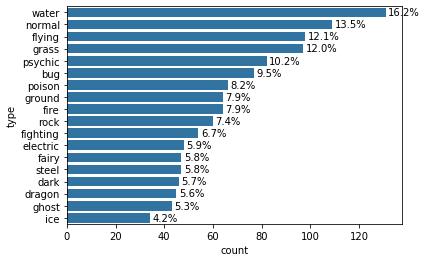

In [132]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)

# there are 18 species in type_counts.shape[0]
for i in range (type_counts.shape[0]):
    # Remember type_counts is the number by species, 131 water, 109 normal, etc.
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count / n_pokemon)
    # the first argument to the text function is its x position
    # the first will be 131, i is first column, and finally it will print the proportion
    # va means vertical alignment, you can use ha horizontal alightment and color ='w' (eg)
    plt.text(count+1, i, pct_string, va = 'center');

In [136]:
pokemon.shape[0]

807

KeyError: '1'

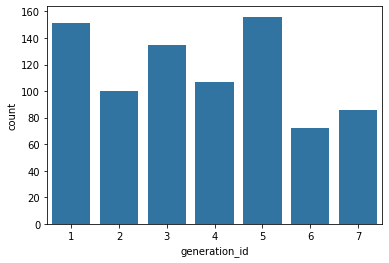

In [177]:
# We can also do this, which is a bit different -- this uses the first bar chart above

# create the plot
base_color = sb.color_palette()[0]
gen_order = pokemon.generation_id.value_counts().index
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)
tick_props = np.arange(0, 7, 1)
tick_names = ['1','2','3','4','5', '6', '7']

# add annotations
n_points = pokemon.shape[0] # = 807
cat_counts = pokemon['generation_id'].value_counts() # series 1: 151 etc

locs, labels = plt.xticks(tick_props, tick_names)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')